# Boston House Prices dataset
-----------------------

## Notes

### Data Set Characteristics:  

- Number of Instances: 506 

- Number of Attributes: 13 numeric/categorical predictive
    
- Median Value (attribute 14) is usually the target

- Attribute Information (in order):

| Idx | Field | Description |
|----:|-------|-------------|
|0| CRIM   |  per capita crime rate by town |
|1| ZN     |  proportion of residential land zoned for lots over 25,000 sq.ft. |
|2| INDUS  |  proportion of non-retail business acres per town |
|3| CHAS   |  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
|4| NOX    |  nitric oxides concentration (parts per 10 million) |
|5| RM     |  average number of rooms per dwelling |
|6| AGE    |  proportion of owner-occupied units built prior to 1940 |
|7| DIS    |  weighted distances to five Boston employment centres |
|8| RAD    |  index of accessibility to radial highways |
|9| TAX    |  full-value property-tax rate per \$10,000 |
|10| PTRATIO|  pupil-teacher ratio by town |
|11| B      |  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
|12| LSTAT  |  % lower status of the population |
|-| MEDV   |  Median value of owner-occupied homes in $1000's |

- Missing Attribute Values: None

- Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
[http://archive.ics.uci.edu/ml/datasets/Housing](http://archive.ics.uci.edu/ml/datasets/Housing)


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

> The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
> prices and the demand for clean air', J. Environ. Economics & Management,
> vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
> ...', Wiley, 1980.   N.B. Various transformations are used in the table on
> pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.
     
### References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
   - many more! (see http://archive.ics.uci.edu/ml/datasets/Housing)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()

## Analysis
### The median and average home values across all Boston Suburbs in dollars.

In [2]:
np.median(boston.target) * 1000

21200.0

In [3]:
np.mean(boston.target) * 1000

22532.806324110676

### The median home value of the suburb with the newest houses.

In [4]:
newest = boston.data.argmin(axis=0)[6]

In [5]:
boston.target[newest] * 1000

26600.0

### The relationship between per-capita crime rate and the pupil-teacher ratio.
Differentiate between whether or not the suburb is bounded by the Charles River.

In [6]:
data_by_attr = np.transpose(boston.data)

In [7]:
river_prop = data_by_attr[3]

In [8]:
crime = data_by_attr[0]
river_crime = crime[river_prop == 1]
no_river_crime = crime[river_prop == 0]

In [9]:
pt_ratio = data_by_attr[10]
river_pt_ratio = pt_ratio[river_prop == 1]
no_river_pt_ratio = pt_ratio[river_prop == 0]

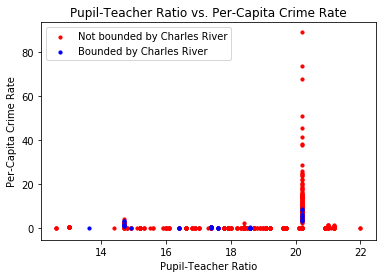

In [10]:
plt.title('Pupil-Teacher Ratio vs. Per-Capita Crime Rate')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Per-Capita Crime Rate')

plt.scatter(no_river_pt_ratio, no_river_crime, s=10, c='red', label='Not bounded by Charles River')
plt.scatter(river_pt_ratio, river_crime, s=10, c='blue', label='Bounded by Charles River')

plt.legend()

plt.show()

Comparision between the per-capita crime rate and the pupil-teacher ratio in a town. The areas that are bounded by the Charles River are marked in a different color from those not bounded. In general, the areas bounded by the river are comparable to those not bounded, and the crime rate is low regardless of the pupil-teacher ratio. However, there is a spike in crime rate at a ratio of 20.2 that reaches 8.98% for river properties and 88.98% for non-river properties. This spike may be due to the lage number of data points for the 20.2 pupil-teacher ratio in the non-river properties, however the mean crime rate for this ratio is significantly higher than the other ratios at 12.34%.

In [11]:
no_river_crime[no_river_pt_ratio == 20.2].mean()

12.336070833333334

### The relationship between the proportion of black citizens and the distance to employment centers in Boston.

In [12]:
b_cits = data_by_attr[11]

In [13]:
employ = data_by_attr[7]

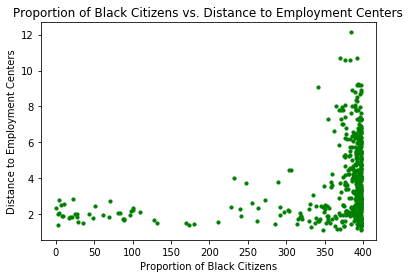

In [14]:
plt.title('Proportion of Black Citizens vs. Distance to Employment Centers')
plt.xlabel('Proportion of Black Citizens')
plt.ylabel('Distance to Employment Centers')

plt.scatter(b_cits, employ, s=10, c='green')

plt.show()

Comparision between the proportion of black citizens and the weighted distance to employment centers. Areas that are closest to employment centers either have very low proportions of black citizens or very high proportions. The areas with the highest proportions can be any distance from employment centers, but only the areas furthest from the employment centers have the highest proportion of black citizens.

### The relationship between median value of owner-occuped homes and nitric oxide concentration along with median home value and the proportion of non-retail business (on the same plot).

In [15]:
nox = data_by_attr[4]

In [16]:
business = data_by_attr[2]

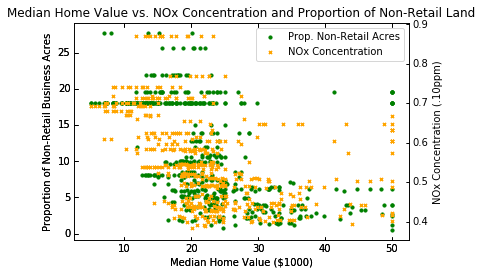

In [17]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
bus_axis = host_subplot(111, axes_class=AA.Axes)
nox_axis = bus_axis.twinx()

plt.title('Median Home Value vs. NOx Concentration and Proportion of Non-Retail Land')
bus_axis.set_xlabel('Median Home Value ($1000)')
bus_axis.set_ylabel('Proportion of Non-Retail Business Acres')
nox_axis.set_ylabel('NOx Concentration (.10ppm)')

bus_axis.scatter(boston.target, business, s=10, c='green', label='Prop. Non-Retail Acres')
nox_axis.scatter(boston.target, nox, s=10, c='orange', marker='x', label='NOx Concentration')

plt.legend()

plt.draw()
plt.show()

Comparison between the median home value, the concentration of nitric oxides, and the proportion of non-retail business acres. Areas with higher value homes generally have lower concentrations of nitric oxides and non-retail areas. Conversely, areas with lower value have much higher NO<sub>x</sub> concentrations and non-retail areas. Overall, the concentration of nitric oxides corresponds directly to the proportion of non-retail business acres, regardess of the median home value of the area.

### The relationship between the proportion of units built prior to 1940 and the concentration of nitric oxides.
Since the concentration of nitric oxides seems to be directly related to the proportion of non-retail acres, what is its relationship with the proportion of older units. Are polutants more directly related to older units or non-retail business acres?

In [18]:
ages = data_by_attr[6]

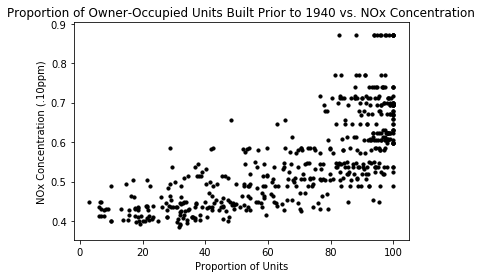

In [19]:
plt.title('Proportion of Owner-Occupied Units Built Prior to 1940 vs. NOx Concentration')
plt.xlabel('Proportion of Units')
plt.ylabel('NOx Concentration (.10ppm)')

plt.scatter(ages, nox, s=10, c='black')

plt.show()

Comparison between the proportion of owner-occupied units built prior to 1940 and the concentration of nitric oxides. Although the differences in NO<sub>x</sub> concentration are small, there are distinctly higher concentrations of nitric oxides in areas that primarily consist of older units. Areas that primarily consist of newer units have much lower concentrations of NO<sub>x</sub>, and the concentration increases as the proportion of older units increases. Thus, the concetration of NO<sub>x</sub> appears to be directly proportional to the proportion of older units in an area.

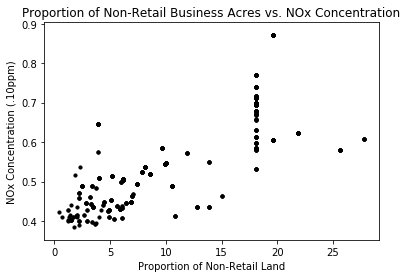

In [20]:
plt.title('Proportion of Non-Retail Business Acres vs. NOx Concentration')
plt.xlabel('Proportion of Non-Retail Land')
plt.ylabel('NOx Concentration (.10ppm)')

plt.scatter(business, nox, s=10, c='black')

plt.show()

Comparison between the proportion of non-retail business acres and the concentration of nitric oxides. The concentration of NO<sub>x</sub> does increase as the proportion of non-retail land increases. However, the increase does not correlate directly with the proportion of non-retail land, since there is a large spike in NO<sub>x</sub> concentration at 18.1%. It should be noted that this may be an artifact of the dataset, as there are very few points for higher proportions of non-retail land.

#### Conclusion
While there are very few data points for higher proportions of non-retail business acres, the concentration of nitric oxides correlates more with the proportion of units built prior to 1940 than with the proportion of non-retail acres. Although the concentration increases with both proportions, the relationship with the proportion of older units is more direct and almost linear. On the other hand, the NO<sub>x</sub> concentration spikes in the middle when compared to the proportion of non-retail land and is much less ordered and complete.